# Hyperparameter Tuning Methods Comparision
# MLPClassifier on digits data

In [3]:
%matplotlib inline

In [7]:
%load_ext autoreload
%autoreload 2
%aimport hpt_cmp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import dataset_loader as ds
import model_loader as mdl
import seaborn as sns

from hpt_cmp import *

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, neural_network
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score ,make_scorer, log_loss, recall_score
from tqdm import tqdm_notebook, tnrange
from skopt.space import Real, Integer, Categorical

In [10]:
# basic sklearn classification DS
#dsBunch = ds.load('digits')
dsBunch = ds.load('iris')
data = (dsBunch.data, dsBunch.target)
n_features = dsBunch.data.shape[1]
dsBunch.data.shape

(150, 4)

# MLPClassifier

Parameters we tune for the MLPClassifier ([full documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)):
> `hidden_layer_sizes`: tuple <br>
> `activation`: {'identity', 'logistic', 'tanh', *'relu'*} <br>
> `solver`: {‘lbfgs’, ‘sgd’, *‘adam’*} <br>
> `alpha`: float, *0.0001* --- regularization term <br>
> `learning_rate`: {*‘constant’*, ‘invscaling’, ‘adaptive’} <br>
> `learning_rate_init`: double, *0.001* <br>
> `random_state` <br>
> `momentum`: float, *0.9* <br>
> `nesterovs_momentum`: bool, *True* <br>
> `early_stopping`: bool, *False* <br>

In [286]:
d_features = n_features*4
hls = [(d_features,)*5, (n_features,)*5, (d_features,)*2, (n_features,)*2, (d_features,), (n_features),]
alpha = [0.0001, 0.001, 0.01, 0.1]
lr = ['adaptive'] #,'constant','invscaling']
lr_init = [0.00001, 0.0001, 0.001, 0.01, 0.1]
rs = [1]

# sklean paramgrid
pg = {
    'hidden_layer_sizes': hls,
    'alpha': alpha,
    'learning_rate': lr,
    'learning_rate_init': lr_init,
    'random_state': rs
}

# hyperopt paramgird
hg={
    'hidden_layer_sizes': hp.choice('hidden_layer_sizes',hls),
    'alpha': hp.loguniform('alpha', np.log(alpha[0]), np.log(alpha[-1])),
    'learning_rate': hp.choice('learning_rate',lr),
    'learning_rate_init': hp.loguniform('learning_rate_init', np.log(lr_init[0]),np.log(lr_init[-1])),
    'random_state': hp.choice('random_state', rs)
}

# skopt paramgrid 
bg = {
    'hidden_layer_sizes': Categorical(hls),
    'alpha': Real(alpha[0], alpha[-1], 'loguniform'),
    'learning_rate': Categorical(lr),
    'learning_rate_init': Real(lr_init[0],lr_init[-1], 'logunifrom'),
    'random_state': rs
}

# base model parameters
base = {
    'hidden_layer_sizes':(n_features,), 
    'alpha':0.001,
    'learning_rate': lr[0],
    'learning_rate_init': 0.001,
    'random_state':1}

In [307]:
MAX_ITER = 20
CV_SPLITS = 2
# define MLPClassifier
hpt_objs = [
        HPT_OBJ('Baseline', base, run_baseline, {'cv':CV_SPLITS}),
        HPT_OBJ('Tree of Parzen Est.', hg, tpe_search, {'cv':CV_SPLITS, 'max_iter': MAX_ITER}),
        #HPT_OBJ('Grid Search', pg, grid_search, {}),
        #HPT_OBJ('Random Search', pg, random_search, {'n_iter': MAX_ITER, 'cv':CV_SPLITS, 'refit':'loss'}),
        #HPT_OBJ('Bayes Search', bg, baysian_search, {'n_iter':MAX_ITER, 'cv':CV_SPLITS})
]

gr_objs = [
    HPT_OBJ('Grid Search', pg, grid_search, {'n_jobs':-1,  'cv':CV_SPLITS}),
    HPT_OBJ('Bayes Search', bg, baysian_search, {'n_iter':MAX_ITER, 'cv':CV_SPLITS}),
]

#scoring = {
#     'loss': make_scorer(log_loss, greater_is_better=True, needs_proba=True, labels=dsBunch.target),
#     'acc': make_scorer(accuracy_score),
# }
#scoring = make_scorer(log_loss, greater_is_better=True, needs_proba=True, labels=sorted(np.unique(data[1])))
scoring =  make_scorer(accuracy_score)

mlpc ={
    'model': neural_network.MLPClassifier,
    'hpt_objs': hpt_objs,
    'score': scoring,
    'final_metric': accuracy_score,
    'name': 'RUN-1-iris'
}

In [308]:
# res_gr = cmp_hpt_methods(data, 
#                          model=neural_network.MLPClassifier, 
#                          hpt_objs=gr_objs, 
#                          score=log_loss, 
#                          final_metric=accuracy_score,
#                          max_iter=MAX_ITER)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

-0.6666666666666666
-0.7583333333333333
-0.6666666666666666
-0.9833333333333333
-0.9666666666666667
-0.6666666666666666
-0.95
-0.6666666666666666
-0.9
-0.0
-0.008333333333333333
-0.975
-0.9583333333333333
-0.3333333333333333
-0.9416666666666667
-0.008333333333333333
-0.9583333333333333
-0.0
-0.9666666666666667
-0.008333333333333333



KeyError: 'mean_test_score'

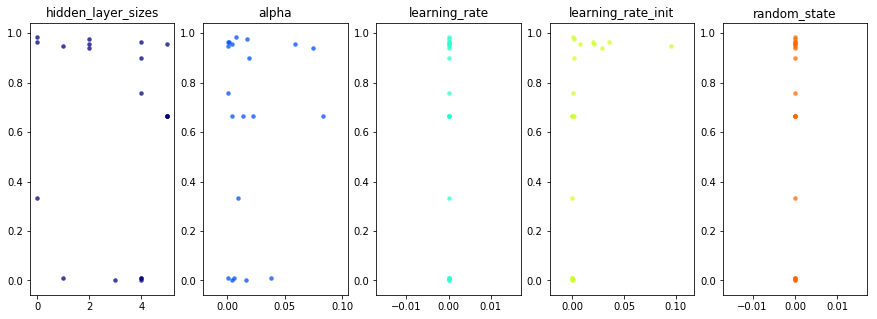

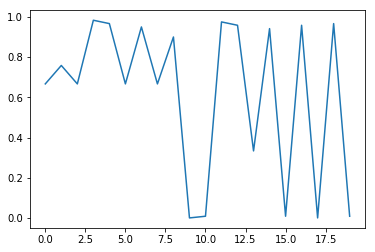

In [309]:
res_gr = cmp_hpt_methods_double_cv(data, **mlpc)

In [ ]:
# run tuning with all the specified algorithms
#res = cmp_hpt_methods(data, **mlpc)

In [ ]:
res = res_gr
res[0][INNER_RES][0]


In [ ]:
for r in res:
    fig = plt.figure()
    for x, i in enumerate(r[INNER_RES], 1):
        if r[HPT_METHOD] == 'Baseline' or x > 5: continue
        p = 510+x
        print(p)
        ax1 = fig.add_subplot(p)
        print(r[HPT_METHOD])
        print(len(i['mean_test_score']))
        x_r = [x for x in range(20)]
        sns.lineplot(y=i['mean_test_score'], x=x_r, label='loss', ax=ax1)
        #sns.lineplot(y=i['mean_test_acc'], x=x_r, label='acc', ax=ax1)

       #print(i['mean_test_loss'])
       #print(i['mean_test_acc'])
    print()

In [234]:
sns.lineplot(y='mean_test_loss', x=x_r, row=HPT_METHOD, data=res,  label='loss')
sns.lineplot(y='mean_test_acc', x=x_r, row=HPT_METHOD, data=res, label='acc')

AttributeError: 'list' object has no attribute 'get'

In [312]:
sum_res = []
for r in res:
    t = np.array(r[INNER_RES][0]['mean_fit_time']).mean()
    #if r[HPT_METHOD] == 'Bayes Search':
    sum_res.append((r[HPT_METHOD], r[MEAN+CV_TIME],len(r[INNER_RES][0]['params']), r[MEAN+TEST_ACC], r[BEST_PARAMS], np.array(r[INNER_RES][0]['mean_test_score']).mean() ))
    #else:
     #   sum_res.append((r[HPT_METHOD], t, len(r[INNER_RES]['params']), r[TEST_ACC], r[BEST_PARAMS], np.array(r[INNER_RES]['mean_test_acc']).mean() ))
                   
df = pd.DataFrame(sum_res, columns=[HPT_METHOD, 'TIME', PARAMS_SAMPLED, TEST_ACC, BEST_PARAMS, 'SCORE'])

In [313]:
#res.append(res_gr[0])
#res.append(res_gr[1])
df

,HPT method,TIME,Parameters sampled,Test accuracy,Best Parameters,SCORE
0,Baseline,0.338930,1,0.666667,"[{'hidden_layer_sizes': (4,), 'alpha': 0.001, ...",0.666667
1,Tree of Parzen Est.,9.044357,20,0.973333,"[{'alpha': 0.01147569064596418, 'hidden_layer_...",0.588333
2,Random Search,7.720402,20,0.973333,"[{'random_state': 1, 'learning_rate_init': 0.0...",0.630000
3,Bayes Search,33.369513,20,0.973333,"[{'alpha': 0.0001, 'hidden_layer_sizes': (16, ...",0.850833


In [227]:
df #prev


,HPT method,TIME,Parameters sampled,Test accuracy,Best Parameters,SCORE
0,Baseline,0.338544,1,0.666667,"[{'hidden_layer_sizes': (4,), 'alpha': 0.001, ...",-0.760894
1,Tree of Parzen Est.,8.553593,20,0.006667,"[{'alpha': 0.00032160989352143804, 'hidden_lay...",-0.686043
2,Random Search,8.339236,20,0.033333,"[{'random_state': 1, 'learning_rate_init': 1e-...",-0.823203


In [81]:
# res
# res_new = [res[0], res[3], res[2], res[4], res[1]]
# for r in res_new:
#     print(r[HPT_METHOD])
# res = res_new

Baseline
Baseline
Random Search
Tree of Parzen Est.
Tree of Parzen Est.


In [110]:
sum_res = []
for r in res:
    try:
        sum_res.append((r[HPT_METHOD], r[CV_TIME],len(r[INNER_RES]['params']), r[TEST_ACC], r[BEST_PARAMS], np.array(r[INNER_RES]['mean_test_score']).mean() ))
    except Exception as e:
        print(e)
        print(type(r))
        print(r)
        print(type(r[INNER_RES]))
        
df = pd.DataFrame(sum_res, columns=[HPT_METHOD, 'TIME', PARAMS_SAMPLED, TEST_ACC, BEST_PARAMS, 'SCORE'])

list indices must be integers or slices, not str
<class 'dict'>
{'Model': 'MLPClassifier', 'HPT method': 'Baseline', 'Test accuracy': [0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666], 'Best Parameters': [{'hidden_layer_sizes': (4,), 'alpha': 0.001, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'random_state': 1}, {'hidden_layer_sizes': (4,), 'alpha': 0.001, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'random_state': 1}, {'hidden_layer_sizes': (4,), 'alpha': 0.001, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'random_state': 1}, {'hidden_layer_sizes': (4,), 'alpha': 0.001, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'random_state': 1}, {'hidden_layer_sizes': (4,), 'alpha': 0.001, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'random_state': 1}], 'Parameters sampled': [16, 16, 16, 16, 16], 'Cross-val. time (in s)': [0.3516240119934082, 0.31008434295654297, 0.32167935371398

In [111]:
df

,HPT method,TIME,Parameters sampled,Test accuracy,Best Parameters,SCORE


In [112]:
pd.DataFrame(df[BEST_PARAMS].tolist())

""


[Text(0, 0, 'Baseline'), Text(0, 0, 'Grid'), Text(0, 0, 'Random')]

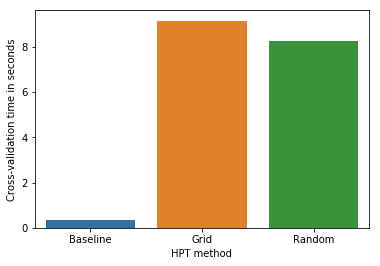

<Figure size 432x288 with 0 Axes>

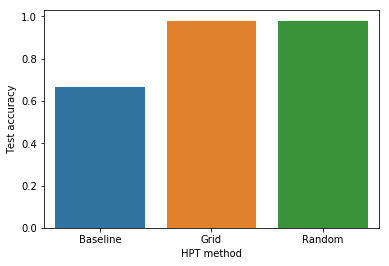

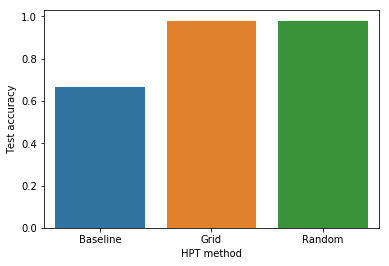

In [237]:
# plot comparison
fig, ax=plt.subplots()
sns.barplot(y='TIME', x=HPT_METHOD,data =df,ax=ax)
ax.set_ylabel('Cross-validation time in seconds')
ax.set_xticklabels(['Baseline','Grid', 'Random', 'Bayes', 'TPE'])
plt.figure()
# plot accuracy comparison
fig, ax =plt.subplots()
#ax.set(ylim=(0.9, 1.0))
sns.barplot(y=TEST_ACC, x=HPT_METHOD, ax=ax,data =df)
ax.set_xticklabels(['Baseline','Grid', 'Random', 'Bayes', 'TPE'])
fig, ax =plt.subplots()
#ax.set(ylim=(0.9, 1.0))
sns.barplot(y=TEST_ACC, x=HPT_METHOD, ax=ax,data =df)
ax.set_xticklabels(['Baseline','Grid', 'Random', 'Bayes', 'TPE'])

In [238]:
pd.DataFrame(df[BEST_PARAMS].tolist())

,0,1,2,3,4
0,"{'hidden_layer_sizes': (4,), 'alpha': 0.001, '...","{'hidden_layer_sizes': (4,), 'alpha': 0.001, '...","{'hidden_layer_sizes': (4,), 'alpha': 0.001, '...","{'hidden_layer_sizes': (4,), 'alpha': 0.001, '...","{'hidden_layer_sizes': (4,), 'alpha': 0.001, '..."
1,"{'alpha': 0.00605823416024644, 'hidden_layer_s...","{'alpha': 0.00016414314611071267, 'hidden_laye...","{'alpha': 0.00011667030674356492, 'hidden_laye...","{'alpha': 0.0015613733942343307, 'hidden_layer...","{'alpha': 0.04536616150091172, 'hidden_layer_s..."
2,"{'random_state': 1, 'learning_rate_init': 0.01...","{'random_state': 1, 'learning_rate_init': 0.1,...","{'random_state': 1, 'learning_rate_init': 0.1,...","{'random_state': 1, 'learning_rate_init': 0.01...","{'random_state': 1, 'learning_rate_init': 0.01..."


In [129]:
for r in res:
    plot_confusion_matrix(r[CONF_MATRIX], dsBunch.target_names)

AttributeError: 'list' object has no attribute 'astype'

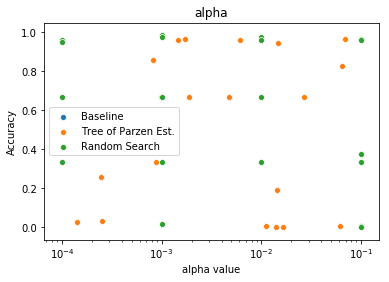

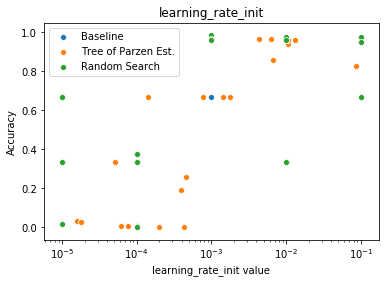

In [241]:
for param in ['alpha', 'learning_rate_init']:
    fig, ax = plt.subplots()
    ax.set_xscale('log')
    for r in res:
        ax = sns.scatterplot(x='param_'+param, y='mean_test_acc', data=r[INNER_RES][0], label=r[HPT_METHOD])
    ax.set_title(param)
    ax.set_xlabel(param+' value')
    ax.set_ylabel('Accuracy')

In [132]:
pd.DataFrame(res[1][INNER_RES])


,loss,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_learning_rate_init,param_random_state,params,status,std_fit_time,std_score_time,std_test_score,std_train_score
0,"[1.5363130034571082, 1.0254449210022545, 1.334...","[0.1036768913269043, 0.13545455932617187, 0.08...","[0.0007505416870117188, 0.0007389068603515625,...","[-1.5363130034571082, -1.0254449210022545, -1....","[-1.5360408602507867, -1.025228125669004, -1.3...","[0.0031847581767453087, 0.010977982751117133, ...","[(16, 16), (4, 4, 4, 4, 4), (16,), (16, 16, 16...","[adaptive, adaptive, adaptive, adaptive, adapt...","[1.571993648850935e-05, 0.0002980462788011059,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[{'alpha': 0.0031847581767453087, 'hidden_laye...","[ok, ok, ok, ok, ok, ok, ok, ok, ok, ok, ok, o...","[0.013243897750294331, 0.023603539137966412, 0...","[3.957690962408936e-05, 3.104587098393083e-05,...","[0.016721910070364148, 0.0023429919147673964, ...","[0.004168333108606148, 0.0005119422910143685, ..."
1,"[0.10993918902508952, 0.12088100887961617, 0.5...","[0.13149261474609375, 0.09103269577026367, 0.0...","[0.0007235527038574219, 0.0008428573608398437,...","[-0.10993918902508952, -0.12088100887961617, -...","[-0.10293982215994772, -0.07796262030084924, -...","[0.0007011085004693661, 0.011448728547282225, ...","[(4, 4, 4, 4, 4), (16, 16, 16, 16, 16), 4, (4,...","[adaptive, adaptive, adaptive, adaptive, adapt...","[0.005911320569934041, 0.03324040109958538, 0....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[{'alpha': 0.0007011085004693661, 'hidden_laye...","[ok, ok, ok, ok, ok, ok, ok, ok, ok, ok, ok, o...","[0.004917326575444571, 0.02686057735810363, 0....","[1.6848891023978194e-05, 0.0002041841766937766...","[0.04684877987616968, 0.15999495359708596, 0.0...","[0.015295703143677022, 0.04629788002368417, 0...."
2,"[2.2494036934482184, 2.1922545287888107, 0.492...","[0.0966158390045166, 0.08330736160278321, 0.07...","[0.0008362770080566406, 0.0006963253021240234,...","[-2.2494036934482184, -2.1922545287888107, -0....","[-2.2494030115648953, -2.1922554195599604, -0....","[0.0002575740583125208, 0.00024235191141082707...","[(4, 4), (4, 4), (16,), (4, 4, 4, 4, 4), (16, ...","[adaptive, adaptive, adaptive, adaptive, adapt...","[1.1799633312493925e-05, 2.7373603816705305e-0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[{'alpha': 0.0002575740583125208, 'hidden_laye...","[ok, ok, ok, ok, ok, ok, ok, ok, ok, ok, ok, o...","[0.014086616360398537, 0.003078529819937887, 0...","[0.0001672091622981822, 5.4790560701000084e-05...","[0.04544579573090035, 0.04373127644425473, 0.0...","[0.011369748223482275, 0.011023470414312009, 0..."
3,"[0.8723466195382823, 0.056829100635869975, 0.8...","[0.06850008964538574, 0.12304019927978516, 0.0...","[0.0006632328033447266, 0.0007468223571777344,...","[-0.8723466195382823, -0.056829100635869975, -...","[-0.8722686705835404, -0.010822105522095025, -...","[0.025185648189158263, 0.006802887927994594, 0...","[4, (16, 16, 16, 16, 16), (16, 16), 4, (4, 4),...","[adaptive, adaptive, adaptive, adaptive, adapt...","[0.0003851974537471395, 0.00890573838968811, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[{'alpha': 0.025185648189158263, 'hidden_layer...","[ok, ok, ok, ok, ok, ok, ok, ok, ok, ok, ok, o...","[0.006097610501162223, 0.0619683686973321, 0.0...","[1.558856445902572e-05, 2.63033507762641e-05, ...","[0.007162136902580804, 0.08980518286060349, 0....","[0.0018327255172626994, 0.008733624415583115, ..."
4,"[1.0559269480735742, 0.5236340336373478, 1.269...","[0.12408208847045898, 0.17115345001220703, 0.0...","[0.0007325649261474609, 0.0008561611175537109,...","[-1.0559269480735742, -0.5236340336373478, -1....","[-1.0557301526749767, -0.5175992346608225, -1....","[0.0002631292945521584, 0.0001519778029227375,...","[(4, 4, 4, 4, 4), (16, 16, 16, 16, 16), (4, 4)...","[adaptive, adaptive, adaptive, adaptive, adapt...","[0

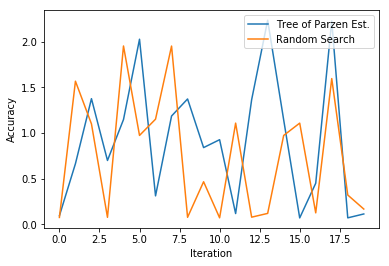

In [245]:
fig, ax = plt.subplots()
ax.set_ylabel('Accuracy')
ax.set_xlabel('Iteration')
for r in res:
    if r[HPT_METHOD] == 'Baseline': continue
    d = r[INNER_RES][0]['mean_test_loss']
    sns.lineplot(x=[i for i in range(len(d))], y=d, label=r[HPT_METHOD])